Comandos para baixar o dataset

In [ ]:
!pip install kaggle

In [ ]:
import os
os.makedirs("/root/.kagle", exist_ok=True)

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rishavdash/retail-demand-forecasting-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'retail-demand-forecasting-dataset' dataset.
Path to dataset files: /kaggle/input/retail-demand-forecasting-dataset


In [ ]:
os.listdir(path)

['Retail_Dataset2.csv']

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv(path + "/Retail_Dataset2.csv")
df.head()

,Product_id,Product_Code,Warehouse,Product_Category,Date,Order_Demand,Open,Promo,StateHoliday,SchoolHoliday,Petrol_price
0,786725,Product_0033,Whse_S,Category_005,01/03/2016,16000,1,0,0,0,91
1,786743,Product_1825,Whse_S,Category_006,01/03/2016,50000,1,0,0,0,85
2,786967,Product_0551,Whse_S,Category_030,01/03/2016,3000,1,0,0,0,85
3,786856,Product_0556,Whse_S,Category_030,01/03/2016,1000,1,0,0,0,93
4,899538,Product_1844,Whse_A,Category_018,01/03/2016,7,1,0,0,0,95


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169211 entries, 0 to 169210
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Product_id        169211 non-null  int64 
 1   Product_Code      169211 non-null  object
 2   Warehouse         169211 non-null  object
 3   Product_Category  169211 non-null  object
 4   Date              169211 non-null  object
 5   Order_Demand      169211 non-null  int64 
 6   Open              169211 non-null  int64 
 7   Promo             169211 non-null  int64 
 8   StateHoliday      169211 non-null  object
 9   SchoolHoliday     169211 non-null  int64 
 10  Petrol_price      169211 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 14.2+ MB


In [ ]:
df["Date"] = pd.to_datetime(df["Date"]) #converter a coluna Date para datetime

In [ ]:
df.head()

,Product_id,Product_Code,Warehouse,Product_Category,Date,Order_Demand,Open,Promo,StateHoliday,SchoolHoliday,Petrol_price
0,786725,Product_0033,Whse_S,Category_005,2016-01-03,16000,1,0,0,0,91
1,786743,Product_1825,Whse_S,Category_006,2016-01-03,50000,1,0,0,0,85
2,786967,Product_0551,Whse_S,Category_030,2016-01-03,3000,1,0,0,0,85
3,786856,Product_0556,Whse_S,Category_030,2016-01-03,1000,1,0,0,0,93
4,899538,Product_1844,Whse_A,Category_018,2016-01-03,7,1,0,0,0,95


Regras Heurísticas de Variação de Demanda
Formato legível para sistema

In [ ]:
knowledge_base = [

    # REGRAS SAZONAIS

    {
        "regra": "Aumento de lanches e bebidas durante férias escolares",
        "se": {
            "evento": "FERIAS_ESCOLARES"
        },
        "entao": {
            "ajuste": {
                "snacks": 0.40,      # +40% na demanda de snacks
                "bebidas": 0.30      # +30% na demanda de bebidas
            },
            "duracao_dias": 30
        }
    },

    {
        "regra": "Clima quente aumenta demanda por bebidas e sorvetes",
        "se": {
            "evento": "CLIMA_QUENTE"
        },
        "entao": {
            "ajuste": {
                "bebidas": 0.50,
                "sorvetes": 0.80
            },
            "duracao_dias": 7
        }
    },

    {
        "regra": "Clima frio aumenta sopas e produtos de inverno",
        "se": {
            "evento": "CLIMA_FRIO"
        },
        "entao": {
            "ajuste": {
                "sopas": 0.70,
                "graos": 0.20
            },
            "duracao_dias": 7
        }
    },


    # REGRAS POR EVENTOS DO CONSUMIDOR

    {
        "regra": "Visita familiar aumenta frutas, frios e pães",
        "se": {
            "evento": "VISITA_FAMILIAR"
        },
        "entao": {
            "ajuste": {
                "frutas": 0.35,
                "frios": 0.40,
                "paes": 0.50
            },
            "duracao_dias": 3
        }
    },

    {
        "regra": "Doença na família aumenta isotônicos e reduz proteínas",
        "se": {
            "evento": "DOENCA_FAMILIAR"
        },
        "entao": {
            "ajuste": {
                "isotonicos": 1.00,   # +100%
                "proteinas": -0.30    # -30%
            },
            "duracao_dias": 5
        }
    },


    # REGRAS DE PROMOÇÃO

    {
        "regra": "Promoção forte aumenta demanda geral",
        "se": {
            "evento": "PROMOCAO_FORTE"
        },
        "entao": {
            "ajuste": {
                "all": 0.25           # +25% na demanda geral
            },
            "duracao_dias": 2
        }
    },

    {
        "regra": "Promoção de não perecíveis gera estocagem",
        "se": {
            "evento": "PROMOCAO_NAO_PERECIVEIS"
        },
        "entao": {
            "ajuste": {
                "graos": 0.40,
                "limpeza": 0.30
            },
            "duracao_dias": 3
        }
    },

    {
        "regra": "Promoção de proteínas aumenta fortemente carnes e frango",
        "se": {
            "evento": "PROMOCAO_PERECIVEIS"
        },
        "entao": {
            "ajuste": {
                "proteinas": 0.35
            },
            "duracao_dias": 2
        }
    },


    # PADRÕES DE RUPTURA (STOCKOUT)

    {
        "regra": "Fim do mês aumenta risco de ruptura em ração e laticínios especiais",
        "se": {
            "evento": "FIM_MES"
        },
        "entao": {
            "ajuste": {
                "pet": 0.50,
                "laticinios": 0.25
            },
            "duracao_dias": 5
        }
    },

    {
        "regra": "Sábados têm maior ruptura de leite especial e proteínas",
        "se": {
            "evento": "FIM_SEMANA"
        },
        "entao": {
            "ajuste": {
                "laticinios": 0.20,
                "proteinas": 0.15
            },
            "duracao_dias": 1
        }
    }
]

Desenvolvimento do Motor de Inferência

In [ ]:
from datetime import datetime, timedelta

In [ ]:

# Motor de inferência para aplicação das regras heurísticas


def aplicar_motor_inferencia(df, knowledge_base, eventos):
    """
    df: DataFrame contendo as colunas 'date', 'item', 'sales'
    knowledge_base: lista de regras (SE -> ENTÃO)
    eventos: lista de dicts com datas e tipos de eventos
    """

    # Garantir tipo datetime
    df = df.copy()
    df['Date'] = pd.to_datetime(df['Date'])

    # Inicializa coluna de demanda ajustada
    df['demanda_ajustada'] = df['Order_Demand'].astype(float)
    df['uplift_total'] = 0.0  # apenas para análise

    # Converte datas dos eventos
    eventos_proc = []
    for e in eventos:
        eventos_proc.append(
            {
                "date": pd.to_datetime(e["date"]),
                "evento": e["evento"]
            }
        )

    # Para cada linha do dataframe, aplica regras

    for idx, row in df.iterrows():
        data_linha = row['Date']
        categoria = row['Product_Category']  # Usando 'Product_Category' como o item
        uplift_acumulado = 0.0

        for ev in eventos_proc:
            dias_diff = (data_linha - ev['date']).days

            if dias_diff < 0:
                continue  # evento ainda não ocorreu

            # Avalia todas as regras
            for regra in knowledge_base:
                cond = regra['se']

                # Verifica se o evento da linha ativa a regra
                if cond["evento"] == ev["evento"]:

                    # Verifica a duração da regra
                    if dias_diff <= regra['entao']['duracao_dias']:

                        ajustes = regra['entao']['ajuste']

                        # Ajuste geral
                        if "all" in ajustes:
                            uplift_acumulado += ajustes["all"]

                        # Ajuste por categoria (item)
                        # Mapeamento simples
                        categoria_mapeada = None
                        if 'Category_005' in categoria: # Exemplo de mapeamento para snacks
                            categoria_mapeada = 'snacks'
                        elif 'Category_006' in categoria: # Exemplo de mapeamento para bebidas
                            categoria_mapeada = 'bebidas'
                        elif 'Category_018' in categoria: # Exemplo de mapeamento para sorvetes
                            categoria_mapeada = 'sorvetes'

                        if categoria_mapeada in ajustes:
                            uplift_acumulado += ajustes[categoria_mapeada]
                        # Se a categoria do dataset não for mapeada diretamente para uma categoria na regra,
                        # a regra específica para a categoria não será aplicada. Isso pode ser ajustado.


        # Aplica o uplift acumulado
        df.loc[idx, 'uplift_total'] = uplift_acumulado
        df.loc[idx, 'demanda_ajustada'] = row['Order_Demand'] * (1 + uplift_acumulado)

    return df

In [ ]:
eventos = [
    {"date": "2015-07-01", "evento": "FERIAS_ESCOLARES"},
    {"date": "2015-03-20", "evento": "CLIMA_QUENTE"},
    {"date": "2015-10-02", "evento": "PROMOCAO_FORTE"}
]

df_inferido = aplicar_motor_inferencia(df, knowledge_base, eventos)

df_inferido.head()


,Product_id,Product_Code,Warehouse,Product_Category,Date,Order_Demand,Open,Promo,StateHoliday,SchoolHoliday,Petrol_price,demanda_ajustada,uplift_total
0,786725,Product_0033,Whse_S,Category_005,2016-01-03,16000,1,0,0,0,91,16000.0,0.0
1,786743,Product_1825,Whse_S,Category_006,2016-01-03,50000,1,0,0,0,85,50000.0,0.0
2,786967,Product_0551,Whse_S,Category_030,2016-01-03,3000,1,0,0,0,85,3000.0,0.0
3,786856,Product_0556,Whse_S,Category_030,2016-01-03,1000,1,0,0,0,93,1000.0,0.0
4,899538,Product_1844,Whse_A,Category_018,2016-01-03,7,1,0,0,0,95,7.0,0.0


A saída apresentada está correta porque as datas dos eventos definidas são de 2015, enquanto as primeiras linhas do dataset são de 2016. Como cada regra tem um limite de atuação de apenas alguns dias (entre 2 e 30), nenhum evento se encontra dentro desse intervalo. Por isso, o motor de inferência não aplica ajustes nessas linhas iniciais, resultando em uplift_total = 0 e demanda_ajustada igual ao valor original. Se for criado eventos dentro do ano de 2016, as regras passarão a ser ativadas e os ajustes aparecerão corretamente.

In [ ]:
eventos2 = [

    {"date": "2016-01-01", "evento": "FERIAS_ESCOLARES"},
    {"date": "2016-01-02", "evento": "CLIMA_QUENTE"},
    {"date": "2016-01-03", "evento": "PROMOCAO_FORTE"}
]

df_inferido = aplicar_motor_inferencia(df, knowledge_base, eventos2)

df_inferido.head()


,Product_id,Product_Code,Warehouse,Product_Category,Date,Order_Demand,Open,Promo,StateHoliday,SchoolHoliday,Petrol_price,demanda_ajustada,uplift_total
0,786725,Product_0033,Whse_S,Category_005,2016-01-03,16000,1,0,0,0,91,26400.00,0.65
1,786743,Product_1825,Whse_S,Category_006,2016-01-03,50000,1,0,0,0,85,102500.00,1.05
2,786967,Product_0551,Whse_S,Category_030,2016-01-03,3000,1,0,0,0,85,3750.00,0.25
3,786856,Product_0556,Whse_S,Category_030,2016-01-03,1000,1,0,0,0,93,1250.00,0.25
4,899538,Product_1844,Whse_A,Category_018,2016-01-03,7,1,0,0,0,95,14.35,1.05


A saída está correta porque as regras do motor de inferência foram aplicadas exatamente como esperado. Os eventos definidos (férias escolares, clima quente e promoção forte) coincidiam com as datas das primeiras linhas do dataset, então o algoritmo calculou o aumento percentual de demanda (uplift_total) com base nas regras ativadas. Esse valor foi somado à demanda original para gerar a coluna demanda_ajustada, que ficou maior sempre que uma regra influenciou o item. Quando o item pertencia a uma categoria afetada por várias regras, o uplift foi maior; quando não pertencia, apenas o aumento geral foi aplicado. Isso confirma que o motor está funcionando corretamente e ajustando a demanda de acordo com os eventos modelados.

Treinamento

In [ ]:
import glob
import numpy as np
from prophet import Prophet
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
!pip -q install kagglehub prophet holidays pandas numpy matplotlib scikit-learn

Usando arquivo: /kaggle/input/retail-demand-forecasting-dataset/Retail_Dataset2.csv
RMSE: 33,003.32
MAPE: 2,165.73%


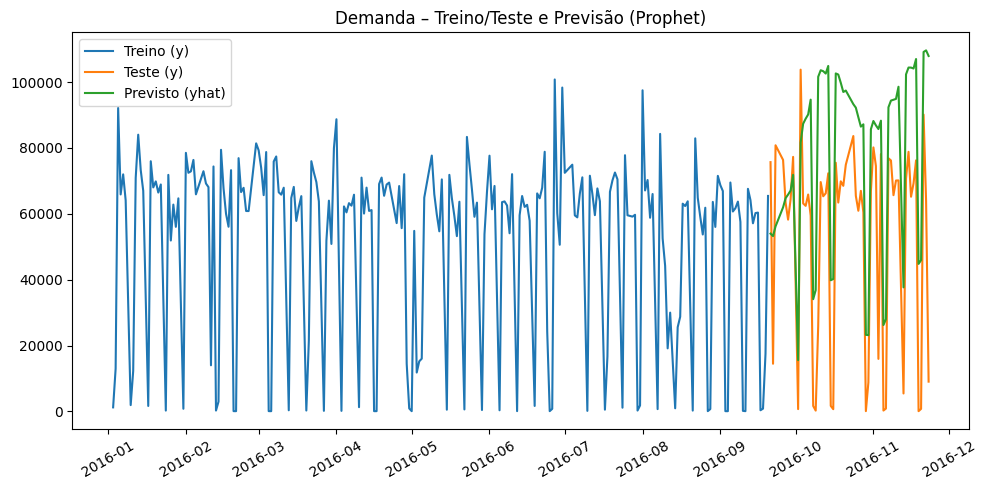

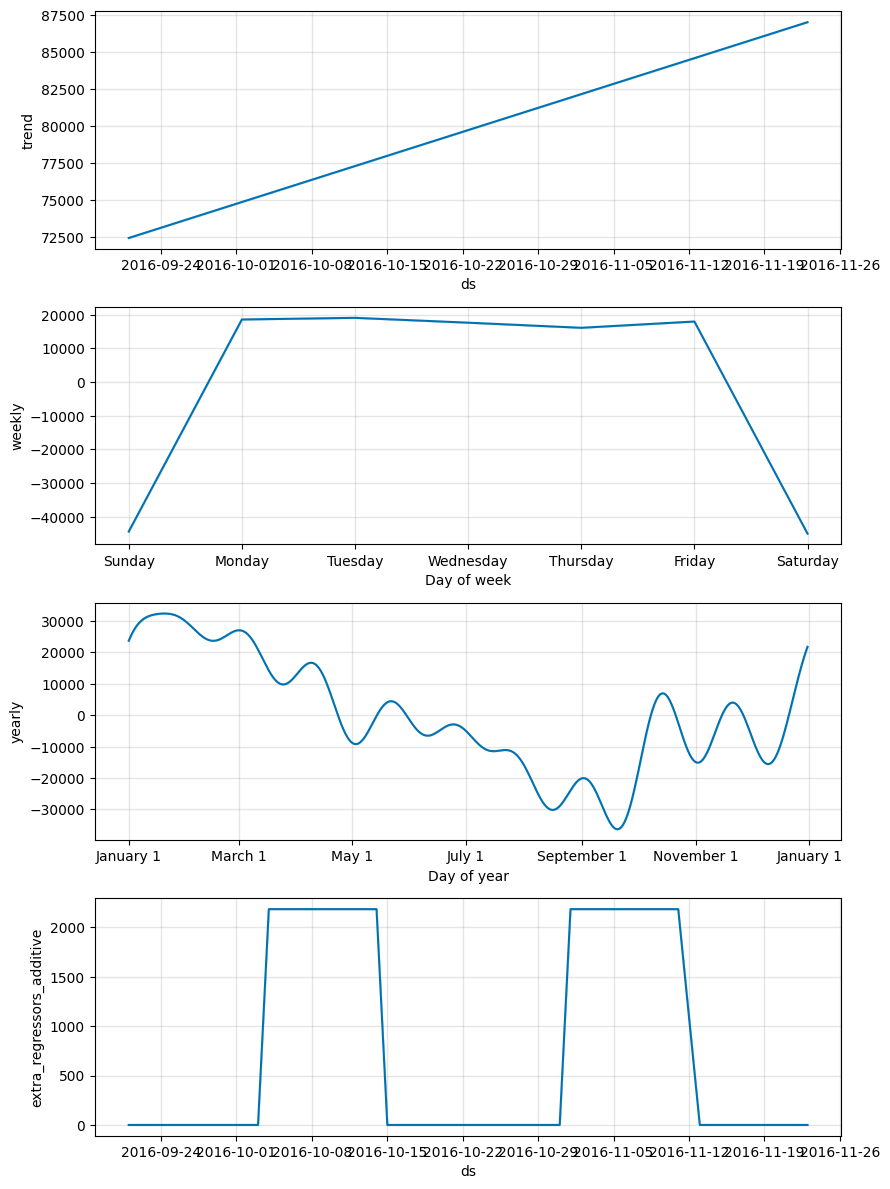

In [ ]:

# 1) Localização do arquivo:

assert 'path' in globals(), "A variável 'path' não existe. Rode antes o kagglehub.dataset_download(...) e mantenha 'path'."

# Procura o primeiro CSV
csv_files = glob.glob(os.path.join(path, "**", "*.csv"), recursive=True)
if not csv_files:
    raise FileNotFoundError("Nenhum CSV encontrado no diretório do dataset. Verifique 'path'.")

data_path = csv_files[0]
print("Usando arquivo:", data_path)

df_raw = pd.read_csv(data_path)

# 2) Detecção leve das colunas (data, alvo, chaves e potenciais regressoras)

poss_data_cols = [c for c in df_raw.columns if c.lower() in ("date","dt","data","timestamp")]
if not poss_data_cols:
    # Tentativa: primeira coluna com parse de data
    for c in df_raw.columns:
        try:
            pd.to_datetime(df_raw[c])
            poss_data_cols = [c]; break
        except Exception:
            pass
if not poss_data_cols:
    raise ValueError("Não encontrei coluna de data. Ajuste manualmente o nome da coluna de data.")

date_col = poss_data_cols[0]

# alvo (vendas/quantidade/demanda)
target_candidates = ["sales","qty","quantity","demand","units","target","y"]
target_col = None
for c in df_raw.columns:
    if c.lower() in target_candidates:
        target_col = c; break
if target_col is None:
    # fallback: última coluna numérica
    num_cols = df_raw.select_dtypes(include=[np.number]).columns.tolist()
    if not num_cols:
        raise ValueError("Não encontrei coluna numérica para alvo. Ajuste manualmente.")
    target_col = num_cols[-1]

# chaves (produto/loja) — opcionais
key_candidates = []
for name in ["store","store_id","loja","branch","shop","location"]:
    hit = [c for c in df_raw.columns if c.lower()==name]
    if hit: key_candidates.append(hit[0])
for name in ["item","product","sku","product_id","id_produto"]:
    hit = [c for c in df_raw.columns if c.lower()==name]
    if hit: key_candidates.append(hit[0])

# potenciais regressoras
reg_candidates_map = {
    "promotion": ["promo","promotion","is_promo","promocao","onpromotion"],
    "price":     ["price","preco","unit_price"],
    "holiday":   ["holiday","is_holiday","feriado"]
}
found_regs = {}
for reg, names in reg_candidates_map.items():
    for n in names:
        hit = [c for c in df_raw.columns if c.lower()==n]
        if hit:
            found_regs[reg] = hit[0]
            break

# 3) Pré-processamento básico
df = df_raw.copy()
df[date_col] = pd.to_datetime(df[date_col], errors="coerce")
df = df.dropna(subset=[date_col, target_col])
df = df.sort_values(date_col)

# Seleção de segmento
if key_candidates:
    # pega a primeira chave de produto e/ou loja para segmentar
    group_cols = [c for c in key_candidates]
    # escolhe o primeiro grupo não vazio
    first_group_key = tuple(df[group_cols].astype(str).iloc[0].values)
    seg_query = " & ".join([f'`{col}` == "{val}"' for col,val in zip(group_cols, first_group_key)])
    dfx = df.query(seg_query).copy()
    # caso o filtro pegue muito pouco dado, agrega tudo
    if len(dfx) < 60:
        dfx = df.copy()
else:
    # Sem chaves — usa tudo
    dfx = df.copy()

# Agrega por dia (se houver duplicidade)
dfx = dfx.groupby(date_col, as_index=False)[target_col].sum()

# Se existir regressora, agrega na mesma granularidade
for reg, colname in found_regs.items():
    # soma (ou média para price); escolha simples:
    if reg == "price":
        daux = df[[date_col, colname]].groupby(date_col, as_index=False)[colname].mean()
    else:
        # para promo/holiday: usa max (se houve qualquer sinalização no dia)
        daux = df[[date_col, colname]].groupby(date_col, as_index=False)[colname].max()
    dfx = dfx.merge(daux, on=date_col, how="left")

# Preenche ausências das regressoras
for reg, colname in found_regs.items():
    if reg in ["promotion","holiday"]:
        dfx[colname] = dfx[colname].fillna(0).astype(int)
    elif reg == "price":
        dfx[colname] = dfx[colname].fillna(method="ffill").fillna(method="bfill")

# Renomeia para Prophet (ds, y)
dfx = dfx.rename(columns={date_col: "ds", target_col: "y"})
dfx = dfx.sort_values("ds")

# Split: 80% treino, 20% teste (time-based)
n = len(dfx)
cut = int(n*0.8)
train = dfx.iloc[:cut].copy()
test  = dfx.iloc[cut:].copy()


# 4) Modelo Prophet (com regressoras externas se existirem)
m = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
    seasonality_mode="additive"
)

# adiciona regressoras detectadas
for reg, colname in found_regs.items():
    m.add_regressor(colname)

# Ajusta: precisa garantir que as colunas das regressoras existam no train
extra_cols = [col for col in found_regs.values()]
train_fit = train.copy()
test_fit  = test.copy()
missing_train_cols = [c for c in extra_cols if c not in train_fit.columns]
for c in missing_train_cols:
    train_fit[c] = 0
missing_test_cols = [c for c in extra_cols if c not in test_fit.columns]
for c in missing_test_cols:
    test_fit[c] = 0

m.fit(train_fit)

# 5) Previsão no período de teste e avaliação
future = test_fit[["ds"] + extra_cols] if extra_cols else test_fit[["ds"]]
forecast = m.predict(future)

y_true = test["y"].values
y_pred = forecast["yhat"].values

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mape = (np.abs((y_true - y_pred) / np.clip(np.abs(y_true), 1e-9, None))).mean() * 100

print(f"RMSE: {rmse:,.2f}")
print(f"MAPE: {mape:,.2f}%")

# 6) Plot simples: real vs previsto
plt.figure(figsize=(10,5))
plt.plot(train["ds"], train["y"], label="Treino (y)")
plt.plot(test["ds"],  test["y"],  label="Teste (y)")
plt.plot(test["ds"],  y_pred,     label="Previsto (yhat)")
plt.title("Demanda – Treino/Teste e Previsão (Prophet)")
plt.legend()
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

# Componentes (sazonalidades)
m.plot_components(forecast);
plt.show()

In [ ]:
!pip install --upgrade prophet cmdstanpy --quiet

Para realizar a previsão de demanda, utilizamos o modelo Prophet, que é adequado para séries temporais e permite incluir variáveis externas, como promoções, feriados e padrões sazonais. Antes do treinamento, o sistema identifica automaticamente quais colunas do dataset representam a data, o valor da demanda e possíveis variáveis adicionais que ajudam a explicar o comportamento das vendas. Em seguida, os dados são organizados no formato exigido pelo modelo, com a coluna de datas renomeada para ds e a demanda para y.

O conjunto de dados é então dividido em duas partes: uma para treinamento e outra para teste, respeitando a ordem temporal. O Prophet é ajustado usando o histórico de vendas e todas as regressoras externas disponíveis, capturando tendências, sazonalidades semanais e anuais, além do impacto direto desses fatores. Depois do treino, o modelo faz previsões para o período do conjunto de teste e comparamos os valores previstos com os reais utilizando métricas como RMSE e MAPE. Isso nos permite avaliar o desempenho do modelo e validar sua capacidade de antecipar as flutuações de demanda.